# MIS HW3 Assignment - Group 10

Submitted by - Apurva Audi, Disha Gandhi, Harshit Jain

### Q.1. Read in data

Read in the files gold.txt and labels.txt. The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category.You will have to pick the right separator.

In [62]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
#Reading text file with separator tab - gold.txt and drop any missing values
df_gold = pd.read_csv("gold.txt",sep='\t',header=None,names=["url","category"]).dropna()
df_gold.shape

(1517, 2)

In [64]:
#Reading text file with separator tab - labels.txt and drop any missing values
df_labels = pd.read_csv("labels.txt",sep='\t',header=None,names=["turk","url","category"]).dropna()
df_labels.shape

(92721, 3)

### Q.2. Split into two DataFrames

Split the labels DataFrame into two: labels on gold and labels unknown,the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.

In [65]:
#Creating mask to split df_labels into two dataframes
mk_in_gold = df_labels["url"].isin(df_gold["url"])
labels_on_gold = df_labels[mk_in_gold]
labels_unknown = df_labels[~mk_in_gold]
df_labels.shape

(92721, 3)

In [66]:
#Dimensions of new dataframe with urls whose ratings are present in gold.txt 
labels_on_gold.shape

(3324, 3)

In [67]:
#Dimensions of new dataframe with urls whose ratings are absent in gold.txt 
labels_unknown.shape

(89397, 3)

### Q.3. Compute accuracies of turks

Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

In [80]:
#Merging the dataframe which contains gold urls
df_merge_gold = labels_on_gold.merge(df_gold,
                                      left_on = 'url',
                                      right_on = 'url',
                                      suffixes=['_turk','_gold'])
df_merge_gold

,turk,url,category_turk,category_gold
0,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G
1,A153PKAL7OAY36,http://0800-horoscope.com,G,G
2,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G
3,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G
4,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G
...,...,...,...,...
3319,A35CBDDGBM7T6E,http://yousendit.com,G,G
3320,A3J86MK3VIE6ST,http://yousendit.com,G,G
3321,A4GP97LAQCCHJ,http://yousendit.com,G,G
3322,AAQNUEUU7H1Y5,http://yousendit.com,G,G


In [69]:
#Creating mask to compare category/rating of each url with gold rating
mk_comp_match = (df_merge_gold["category_turk"] == df_merge_gold["category_gold"])

#Adding a new column to reflect if the turk and gold category matches
df_merge_gold['Match'] = mk_comp_match
df_merge_gold

,turk,url,category_turk,category_gold,Match
0,A1253FXHCZ9CWM,http://0800-horoscope.com,G,G,True
1,A153PKAL7OAY36,http://0800-horoscope.com,G,G,True
2,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,G,True
3,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,G,True
4,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,G,True
...,...,...,...,...,...
3319,A35CBDDGBM7T6E,http://yousendit.com,G,G,True
3320,A3J86MK3VIE6ST,http://yousendit.com,G,G,True
3321,A4GP97LAQCCHJ,http://yousendit.com,G,G,True
3322,AAQNUEUU7H1Y5,http://yousendit.com,G,G,True


In [70]:
#Creating a new dataframe with turk as index and corresponding count of ratings for each
num_ratings = DataFrame(df_merge_gold.groupby('turk')['category_turk'].count())
num_ratings

,category_turk
turk,
A112DVP1KG4QZU,1
A1253FXHCZ9CWM,29
A12CY1Q7XKJJDE,1
A12RE8G66WTO8B,20
A12Y1GTGIQDGRA,3
...,...
AYWOBMTEGFVVI,1
AZ1S5BIG5R6P6,35
AZSDW7JJL5VA7,100


In [10]:
#Creating a new dataframe for average correctness of ratings between gold and labels
rating_chk = df_merge_gold[['turk','Match']]
rating_chk = rating_chk.groupby('turk').mean()
rating_chk

,Match
turk,
A112DVP1KG4QZU,1.000000
A1253FXHCZ9CWM,0.517241
A12CY1Q7XKJJDE,1.000000
A12RE8G66WTO8B,0.750000
A12Y1GTGIQDGRA,0.333333
...,...
AYWOBMTEGFVVI,0.000000
AZ1S5BIG5R6P6,0.714286
AZSDW7JJL5VA7,0.680000


In [71]:
#Forming a dataframe with turk, number of ratings and average correctness of ratings
rater_goodness = num_ratings.merge(rating_chk, left_on='turk',right_on='turk')
rater_goodness.columns =['Number of Ratings','Average Correctness of Ratings']
rater_goodness

,Number of Ratings,Average Correctness of Ratings
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
...,...,...
AYWOBMTEGFVVI,1,0.000000
AZ1S5BIG5R6P6,35,0.714286
AZSDW7JJL5VA7,100,0.680000


### Q.4. Odds Ratio

If someone is correct p fraction of the time, the odds of success are defined as:
odds =p / 1.001 − p

Attach a column called odds to the rater goodness DataFrame, using the average correctness of the turk as his or her p.

In [72]:
def compute_odds(p) :
    odds = p/(1.001 - p)
    return odds

rater_goodness['odds'] =rater_goodness["Average Correctness of Ratings"].map(compute_odds)
rater_goodness

,Number of Ratings,Average Correctness of Ratings,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380


### Q.5. Most accurate turks

List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [73]:
#Mask to fetch turks who rated atleast 20 gold set URLS.
mk_gold_turks_20 = rater_goodness["Number of Ratings"] >= 20

'''
Using the mask to select a subset of dataframe for each turk with ratings more than 20
Sorting the values by averae correctness of ratings in descending order to get top 10 of such turks
'''
rater_goodness[mk_gold_turks_20].sort_values(by= 'Average Correctness of Ratings',ascending=False)[:10]

,Number of Ratings,Average Correctness of Ratings,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


### Q.6. Rating counts versus accuracy

One may imagine that a committed and accurate turk will rate lots of URLs.On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs. Is number of ratings by a turker on gold set URLs related to his or her accuracy? There’s no fixed answer; just try to show some evidence for your answer.

### Method 1 : Linear Regression Model

In [74]:
#Building simple linear regression model

import statsmodels.api as sm
from patsy import dmatrices

#New column is created with information of ratings. This is done for the ease of regression modeling
rater_goodness['num'] = rater_goodness['Number of Ratings']
rater_goodness['accuracy'] = rater_goodness['Average Correctness of Ratings']

'''
Building a matrix with num regressing over odds to find if there is a statistically significant relationship between
number of ratings by a turker is related to accuracy
'''
y, X = dmatrices('accuracy ~ num', data=rater_goodness, return_type='dataframe')
# Set up the model
model = sm.OLS(y, X) 
# Fit model (find the intercept and slopes)
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               accuracy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5488
Date:                Tue, 02 Aug 2022   Prob (F-statistic):              0.459
Time:                        20:40:40   Log-Likelihood:                -94.663
No. Observations:                 269   AIC:                             193.3
Df Residuals:                     267   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6431      0.024     27.071      0.0

#### RESULT : 
The OLS simple regression results clearly indicate that the number of rating counts has a positive relationship with accuracy which is highlighted by the negative coefficient for 'num'.
This means that when turks provide more ratings, their rating tends to be accurate.
Though if we look at the p value, we can see that the value here 0.459 is less than the threshold(0.05) and so the relationship is not statistically significant. Hence we can conclude that even though there is a positive relationship, it is not so strong for us to be confident about it. 

### Method 2 : Scatterplot

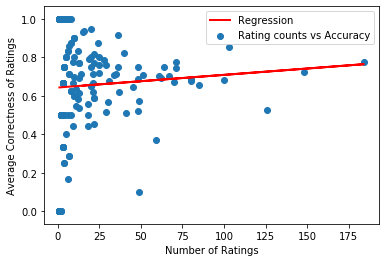

In [75]:
import matplotlib.pyplot as plt
x = rater_goodness['Number of Ratings']
y_actual = rater_goodness['Average Correctness of Ratings']
y_expected = result.params['Intercept'] + result.params['num'] * x

plt.scatter(x, y_actual, label = 'Rating counts vs Accuracy')
plot(x, y_expected, color='red', linewidth=2,label='Regression')
xlabel('Number of Ratings')
ylabel('Average Correctness of Ratings')
legend(loc='best')

#### RESULT :

This scatterplot shows that even when the turks have higher frequency of ratings, the accuracy hasn't reduced. The red line which is regression line shows that trend of rating counts vs accuracy of the ratings.

### Q.7. Overall Predicted Odds

Consider each url u that is not in the gold set, and each category c. For the pair (u, c), calculate the product of odds of all turks who (a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url.
For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-set urls than 75% of these 269 turks. We can think of these as our “reliable” turks. Now, our belief that url u belongs to category c depends on how many “reliable” turks rated u as c; specifically, our belief is based on the product of their reliability scores (i.e., their odds).
We shall call such products of odds the overall odds henceforth.

In [102]:
#creating a df to just filter the turks having the number of gold urls rated to be greater than 75%
#We have taken here greater than equal to because there are 2 entries with 11 as number of ratings and hence to include both we had to do greater than equal to
part_b_filter = rater_goodness[rater_goodness['Number of Ratings']>=rater_goodness['Number of Ratings'].quantile(0.75)]

#creating a df to merge these turks with non gold urls to obtain (u,c) for url category pairs
part_a_filter = pd.merge(part_b_filter, labels_unknown, on="turk")

#grouping by the previous df on category and url pairs to then multiply all the odds on groups as obtained
overall_odds = DataFrame(part_a_filter.groupby(['url', 'category']).odds.prod()).reset_index()

#naming the columns as per the ask of the question
overall_odds.rename(columns={'odds': 'overall odds'}, inplace=True)

overall_odds

,url,category,overall odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,9.914590
4,http://000relationships.com,P,1.851852
...,...,...,...
14109,http://zynga.com,G,3.704611
14110,http://zz868.com,G,1.047852
14111,http://zz868.com,P,1.851852
14112,http://zzx.cc,G,1.330229


### Q.8. Predicted categories

Create a DataFrame (called result 75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the top odds should be the overall odds for that top category.
These are our predictions, and the confidence we have in them (higher overall odds implies greater confidence). If you want, you can check to see if the predicted categories make sense.

In [103]:
#grouping by on url to find the category with the maximum overall odds
result_75 = overall_odds.loc[overall_odds.groupby(['url'])['overall odds'].idxmax()].reset_index(drop=True)

#naming the columns as per the ask of the question
result_75.rename(columns={'category': 'top category 75', 'odds': 'top odds 75'}, inplace=True)

result_75

,url,top category 75,overall odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,9.914590
4,http://000vitamins.com,G,3.784982
...,...,...,...
10605,http://zwinky.com,G,16.141443
10606,http://zylom.com,G,1.735526
10607,http://zynga.com,G,3.704611
10608,http://zz868.com,P,1.851852


### Q.9. Predicted categories using more turks

Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction?
Repeat the code of Q7 and Q8, but replacing 75% by 25% in the descrip- tion of Q7 (i.e., we also consider turks who have far fewer gold set ratings). Call this result 25.
Now let’s see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells
contain the number of urls with these as the top categories according to result 75 and result 25.
For example, the cell corresponding to the row category=R and the col- umn category=G would be the number of URLs that were predicted to be R by result 75 but predicted to be G by result 25.
Where are the most errors?

In [104]:
#creating a df to just filter the turks having the number of gold urls rated to be greater than 25%
part_b_filter = rater_goodness[rater_goodness['Number of Ratings']>rater_goodness['Number of Ratings'].quantile(0.25)]

#creating a df to merge these turks with non gold urls to obtain (u,c) for url category pairs
final_df = pd.merge(part_b_filter, labels_unknown, on="turk")

#grouping by the previous df on category and url pairs to then multiply all the odds on groups as obtained
overall_odds = DataFrame(final_df.groupby(['url', 'category']).odds.prod()).reset_index()

#grouping by on url to find the category with the maximum overall odds
result_25 = overall_odds.loc[overall_odds.groupby(['url'])['odds'].idxmax()].reset_index(drop=True)

#naming the columns as per the ask of the question
result_25.rename(columns={'category': 'top category 25', 'odds': 'top odds 25'}, inplace=True)

result_25

,url,top category 25,top odds 25
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
2,http://0000.jp,G,2.877556e+07
3,http://000relationships.com,P,1.851852e+00
4,http://000vitamins.com,G,5.014149e+00
...,...,...,...
10695,http://zwinky.com,P,1.000000e+03
10696,http://zylom.com,G,2.873345e+03
10697,http://zynga.com,G,5.442125e+01
10698,http://zz868.com,G,1.209566e+13


In [105]:
#merging the two dataframes from greater than 75th percentile and greater 25th percentile turks
comparison_df=pd.merge(result_75,result_25,on="url")

#creating a crosstab to generate the count of urls in each combination of predicted categories
pd.crosstab(comparison_df['top category 75'],comparison_df['top category 25'])

top category 25,G,P,R,X
top category 75,,,,
G,8329,563,175,202
P,180,334,53,15
R,21,36,130,26
X,34,9,29,474


The figures along the diagnol represnt the correct predictions since the column ratings match across greater than 25 percentile and greater than 75 percentile turks.
The maximum error can be observed where greater than 25 percentile predicts P and greater than 75 percentile turks predict G. That can be because these ratings are close to each other on the scale and hence the confusion makes sense a little.The next highest is for G and X which is not good because there doesn't seem to be a valid explaination for that since these ratings are far off in the scale.
The minimum error can be observed for P and X ratings for greater than 25th and 75th percentile respectively.